<a href="https://colab.research.google.com/github/shreyansko/amazon-rev-study/blob/main/models/NLP_Project_NLTK_VADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
groc_data = pd.read_csv("/content/drive/MyDrive/groc_amz_data_processed.csv.gz", sep =',')
groc_data = groc_data.drop(columns = ['unix_timestamp', 'Unnamed: 0'])

In [ ]:
#home_data = pd.read_csv("/content/drive/MyDrive/home_kitchen_data_processed.csv.gz", sep = ",")
#home_data = home_data.drop(columns = ['unix_timestamp', 'Unnamed: 0'])

In [ ]:
import nltk
nltk.download(["vader_lexicon","punkt"])
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sa = SentimentIntensityAnalyzer()

In [ ]:
sa.polarity_scores("For six months, I have been struggling with inexplicable symptoms of what I thought was tendonitis.  Turns out that it was very likely gout caused by the heavy metals contamination in all of the GOL Raw Meal and Raw Protein that I was consuming.  I lost months of productivity, spent a lot of time and money attempting to solve my problem, and damaged my health.  I urge EXTREME CAUTION")

{'compound': -0.836, 'neg': 0.152, 'neu': 0.823, 'pos': 0.026}

In [ ]:
(abc['neg'])

0.787

In [ ]:
df = pd.DataFrame()
for words in groc_data['review_headline'].head(125000):
  tmp = sa.polarity_scores(str(words))
  #df['neg_score'] = tmp['neg']
  #df['pos_score'] = tmp['pos']
  #df['neu_score'] = tmp['neu']
  #df['compound'] = tmp['compound']
  df = df.append({'neg_score': tmp['neg'], 'pos_score': tmp['pos'], 
                  'neu_score': tmp['neu'], 'compound':tmp['compound']},
                 ignore_index = True)

In [ ]:
df['review_headline'] = groc_data['review_headline']


In [ ]:
df['rating'] = groc_data['rating']

In [ ]:
df.head(20)

,compound,neg_score,neu_score,pos_score,review_headline,rating
0,0.6369,0.000,0.488,0.512,Best vanilla I've ever had,5
1,0.5255,0.000,0.228,0.772,Terrific Tea!,5
2,0.0000,0.000,1.000,0.000,grrrrrrr,1
3,0.0000,0.000,1.000,0.000,Storage on Wheels Cart,3
4,0.6369,0.000,0.417,0.583,The best drink mix,5
5,-0.6208,0.266,0.734,0.000,Oops. Made a mistake and ordered this. I mis...,1
6,0.3612,0.000,0.615,0.385,Tastes a Bit like Cough Syrup,3
7,0.0000,0.000,1.000,0.000,"Decent flavor, value...meh.",4
8,0.3182,0.341,0.000,0.659,Interesting bitters,3
9,0.5994,0.000,0.204,0.796,Beautiful dice,5


In [ ]:
df_review = pd.DataFrame()
for words in groc_data['review_text_processed'].head(125000):
  tmp1 = sa.polarity_scores(str(words))
  df_review = df_review.append({'neg_score': tmp1['neg'], 'pos_score': tmp1['pos'], 
                  'neu_score': tmp1['neu'], 'compound':tmp1['compound']},
                 ignore_index = True)

In [ ]:
df_review['reviews'] = groc_data['review_text_processed']
df_review['rating'] = groc_data['rating']
df_review.head(20)

,compound,neg_score,neu_score,pos_score,reviews,rating
0,0.9085,0.036,0.740,0.224,"no sugar, gmo garbage, fillers come store boug...",5
1,0.9793,0.000,0.668,0.332,"this absolute, undisputed favorite tea right n...",5
2,0.6467,0.000,0.843,0.157,i ordered spongbob slippers i got john cena ha...,1
3,-0.5994,0.236,0.604,0.160,the cart fine works purpose i bought it. (farm...,3
4,0.9441,0.000,0.718,0.282,this product archer farms best drink mix ever....,5
5,-0.7717,0.442,0.558,0.000,"don't buy item - rip price. my bad, mistake. p...",1
6,0.7650,0.000,0.784,0.216,my wife picked sale. i usually drink crystal l...,3
7,0.9869,0.020,0.775,0.206,i bought sale (2 $4confusion local supermarket...,4
8,0.2481,0.112,0.797,0.091,i martini local distillery used bit wormwood b...,3
9,0.8316,0.000,0.645,0.355,"i bought part xmas gift, i needed look nice. t...",5


Text(0, 0.5, 'Frequency')

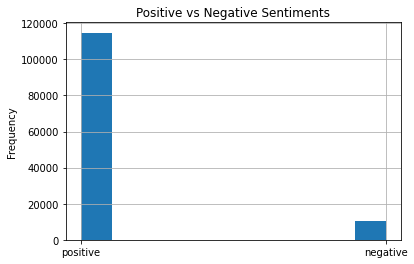

In [ ]:
conditions = [df_review['compound']>=0, df_review['compound']<0]
choices = ['positive', 'negative']
df_review['sentiment'] = np.select(conditions, choices, default = np.nan)
df_review.sentiment.hist()
plt.title('Positive vs Negative Sentiments')
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

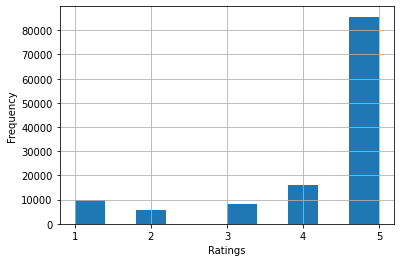

In [ ]:
df_review.rating.hist()
values = [1, 2, 3, 4, 5]
plt.xticks(values)
plt.xlabel("Ratings")
plt.ylabel("Frequency")

In [ ]:
df_review.sentiment.describe()

count       125000
unique           2
top       positive
freq        114762
Name: sentiment, dtype: object

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = smf.ols('compound~rating', data = df_review).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               compound   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 2.563e+04
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:41:16   Log-Likelihood:                -54654.
No. Observations:              125000   AIC:                         1.093e+05
Df Residuals:                  124998   BIC:                         1.093e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0636      0.004     16.679      0.000       0.056       0.071
rating         0.1366      0.001    160.086      0.000       0.135       0.138
==============================================================================
Omnibus:                    35553.404   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92263.567
Skew:                          -1.554   Prob(JB):                         0.00
Kurtosis:                       5.838   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
rating,3597.608625,1.0,25627.601241,0.0
Residual,17547.248325,124998.0,NaN,NaN


In [ ]:
np.array(df_review['sentiment'])

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [ ]:
def prop(x,y):
  a = x/y
  b = (y-x)/y
  print("positive:" , a, ", Negative:" , b)

In [ ]:
prop(82412, 85616)



positive: 0.9625770883946926 , Negative: 0.03742291160530742


In [ ]:
import pickle
pickle.dump(df, open("df_headline.pkl", "wb"))
pickle.dump(df_review, open("df_review.pkl", "wb"))

In [ ]:
import pickle 

In [ ]:
df_review = pickle.load(open("df_review.pkl", "rb"))

FileNotFoundError: ignored

Text(0.5, 1.0, 'Product Review Compound Score against Rating')

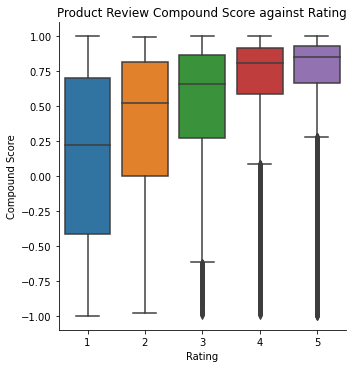

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="rating", y="compound",
            kind="box", data=df_review)
plt.xlabel("Rating")
plt.ylabel("Compound Score")
plt.title("Product Review Compound Score against Rating")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'rating', y = 'compound', data = df, kind = 'violin')
plt.xlabel('Rating')
plt.ylabel('Headline Compound Score')
plt.title("Analyzing Review Headline Compound Score against Product Rating")

NameError: ignored

Text(0.5, 1.0, 'Compound Score using NLTK Sentiment Analysis')

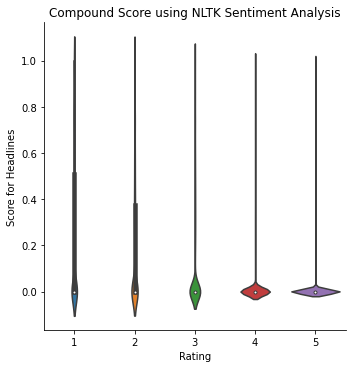

In [ ]:
sns.catplot(x = 'rating', y = 'neg_score', data = df, kind = 'violin')
plt.xlabel('Rating')
plt.ylabel('Score for Headlines')
plt.title("Compound Score using NLTK Sentiment Analysis")

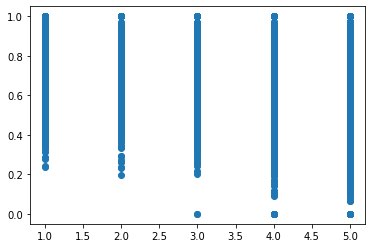

In [ ]:
plt.scatter('rating','neu_score',  data = df_review)